In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
file_path = 'bank-full.csv'
df = pd.read_csv(file_path,sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## **1. Analyzing the data Set**

In [6]:
# cheak null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

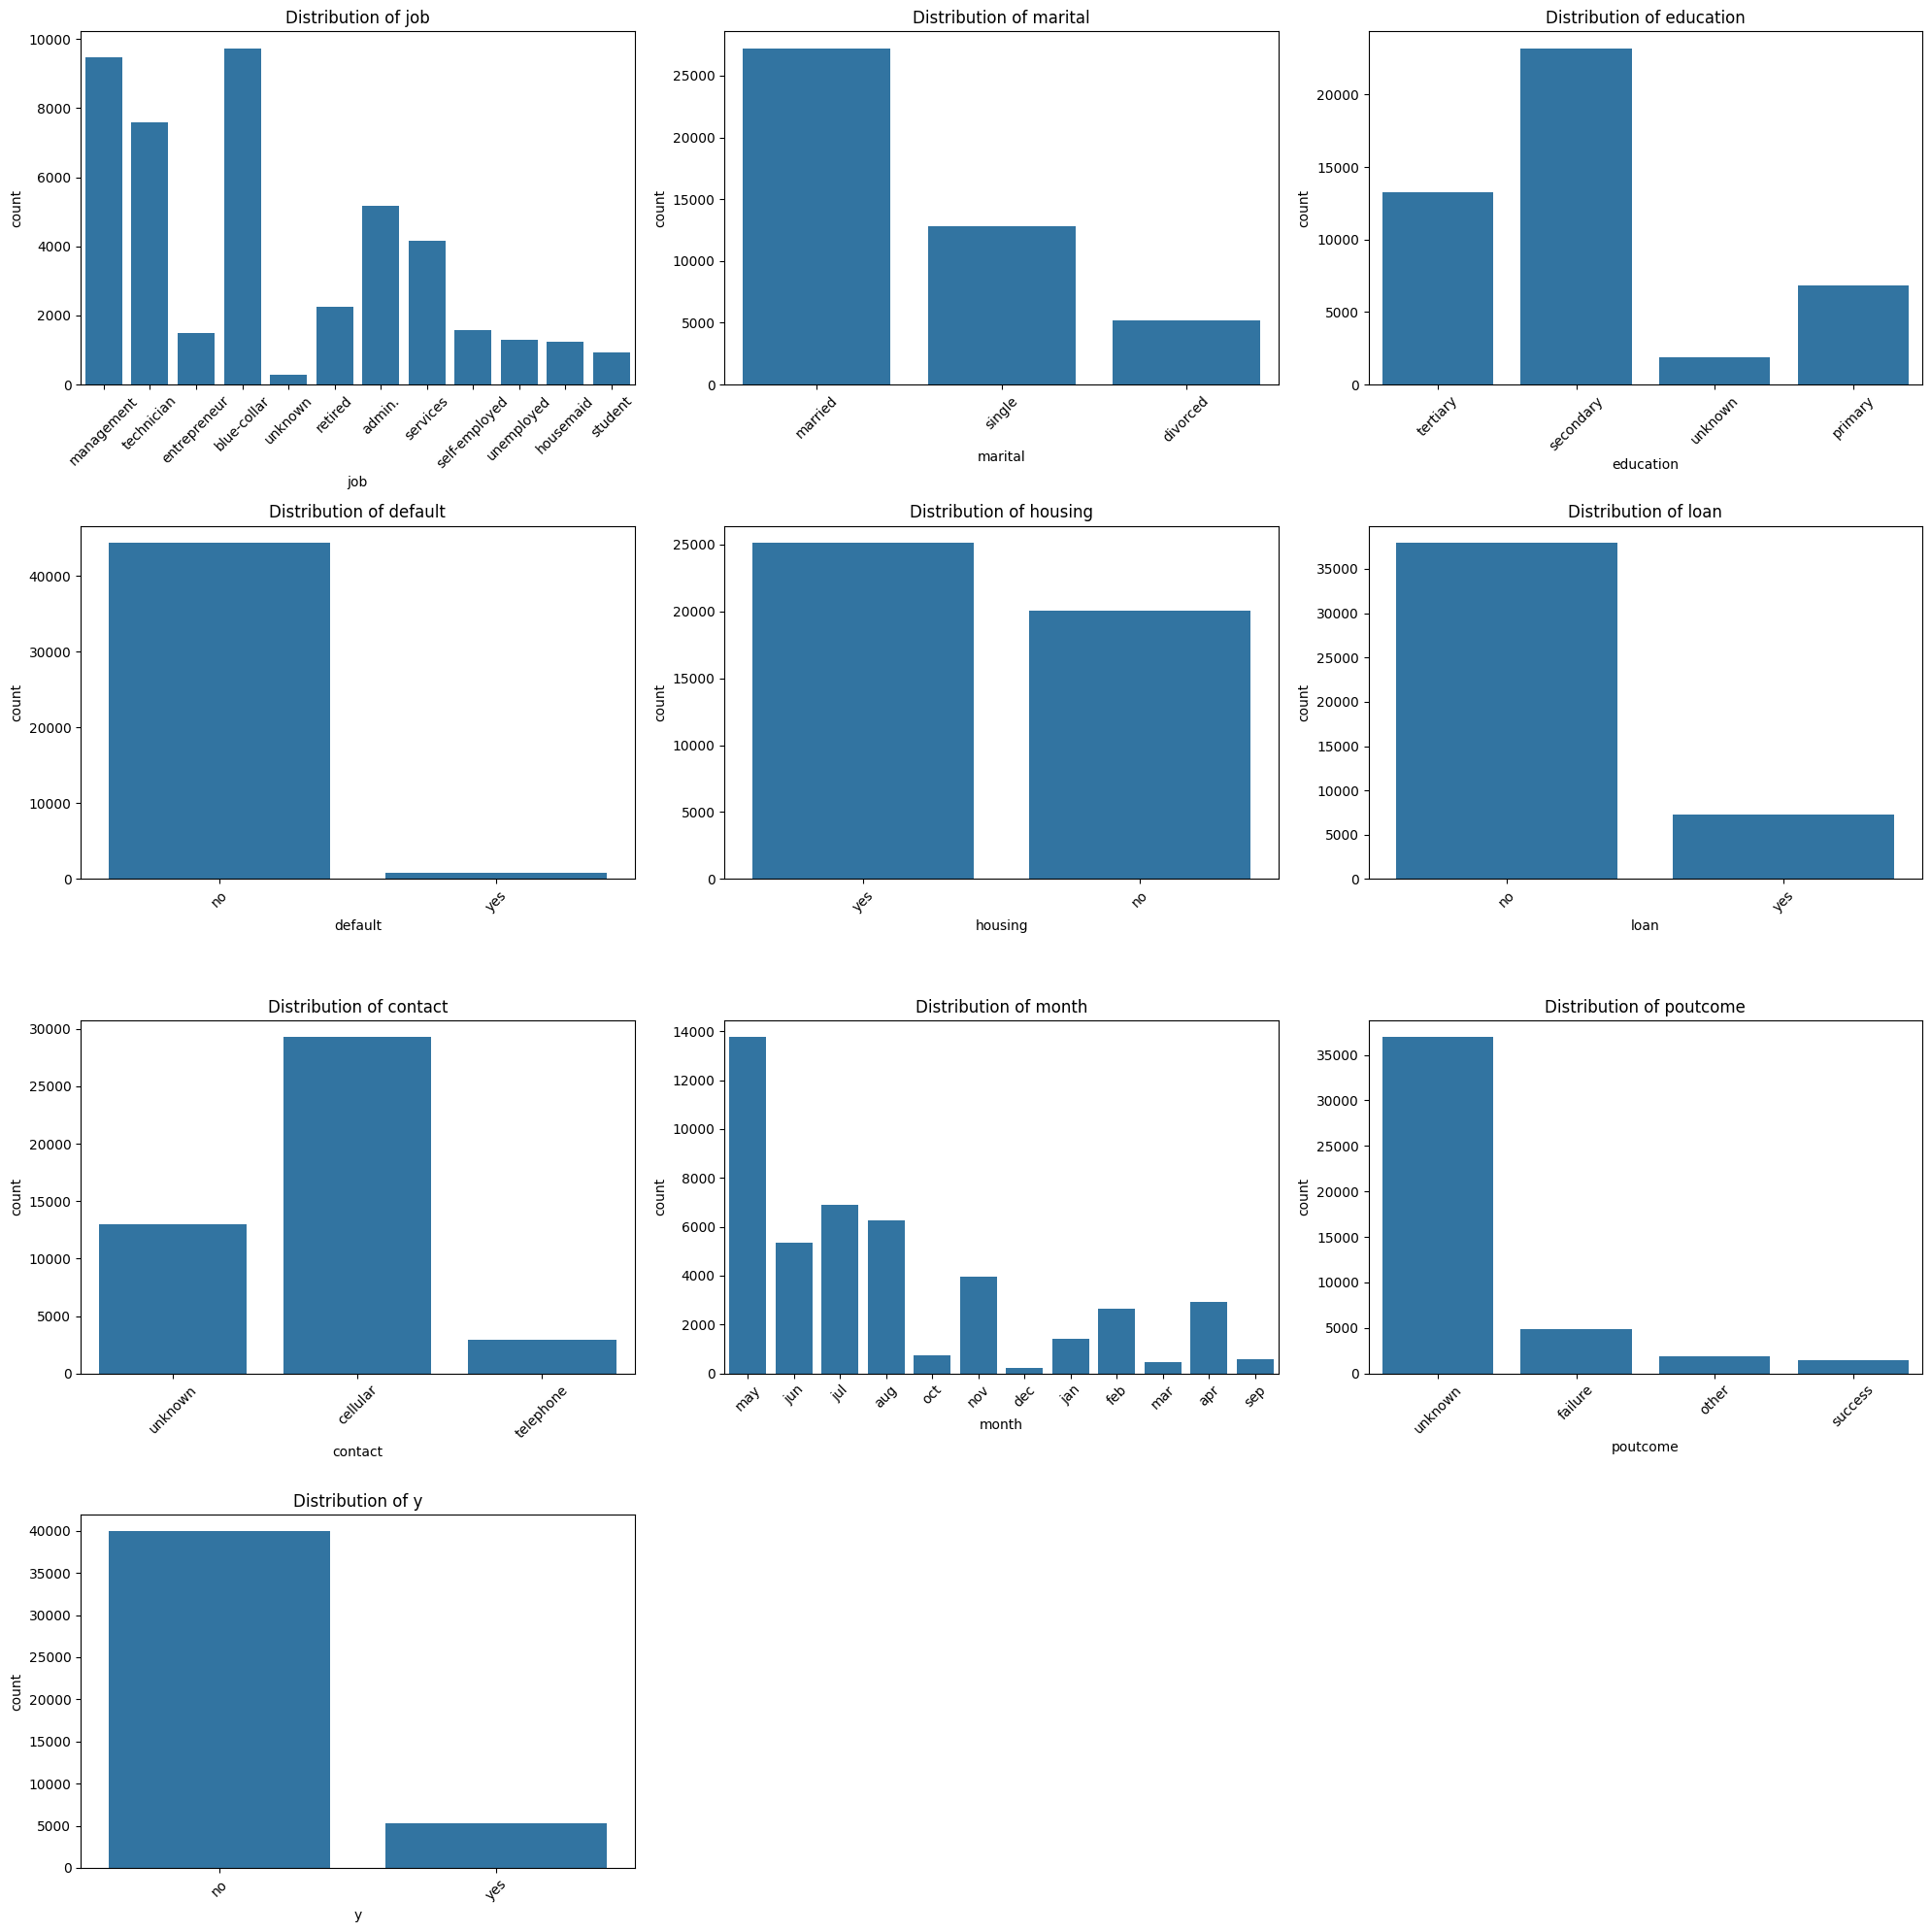

In [7]:
categorical_columns = df.select_dtypes(include="object").columns

#categorical features visual
n_cols = 3  
n_rows = (len(categorical_columns) // n_cols) + 1  

plt.figure(figsize=(20, 5 * n_rows))
plt_number = 1
for column in categorical_columns:
    ax = plt.subplot(n_rows, n_cols, plt_number)
    sns.countplot(x=column, data=df)
    plt.xlabel(column)  
    plt.title(f'Distribution of {column}') 
    plt.xticks(rotation=45)  
    plt_number += 1

plt.tight_layout()

plt.show()


**Findings**
 - we can find the categories of the categorical fetures and the count of it using this
 - data we can understand the type of clients and the backround of them 
 - outcome of the previous marketing campaign
 - number the client subscribed a term deposit



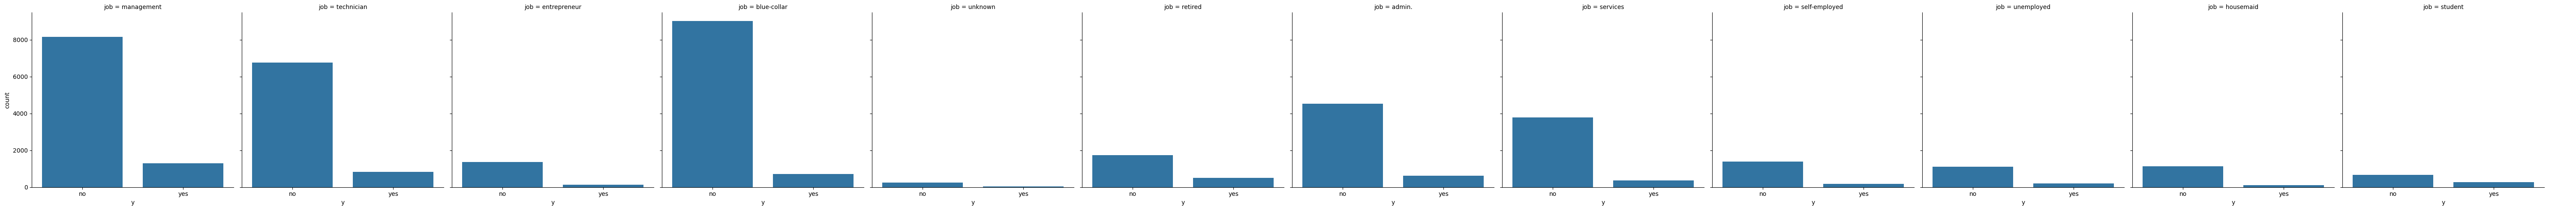

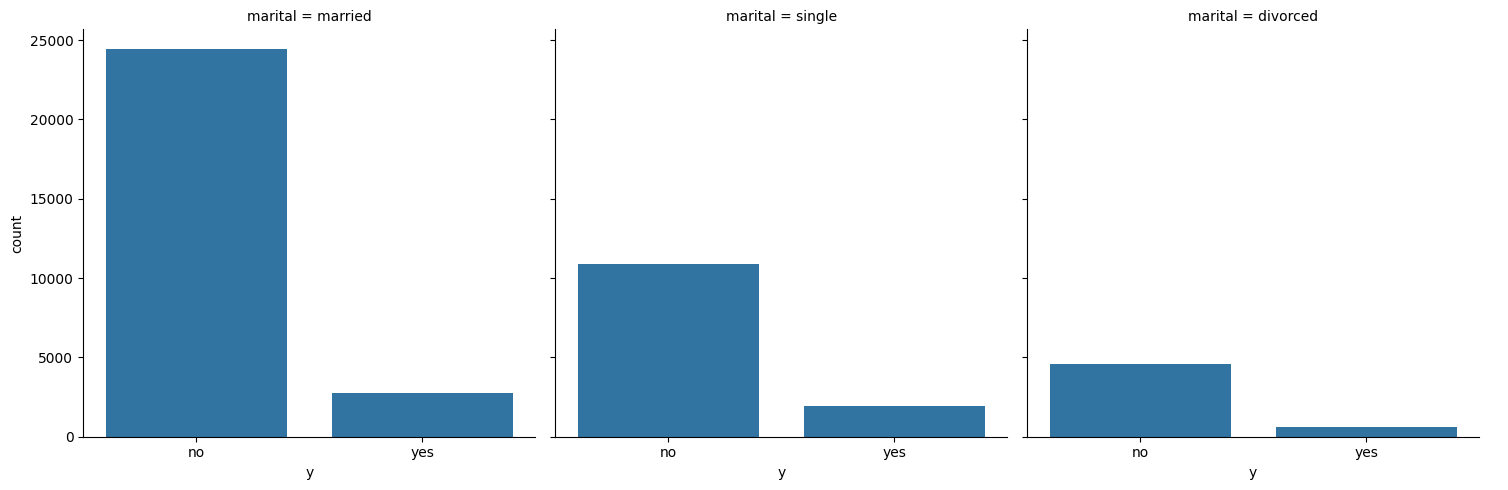

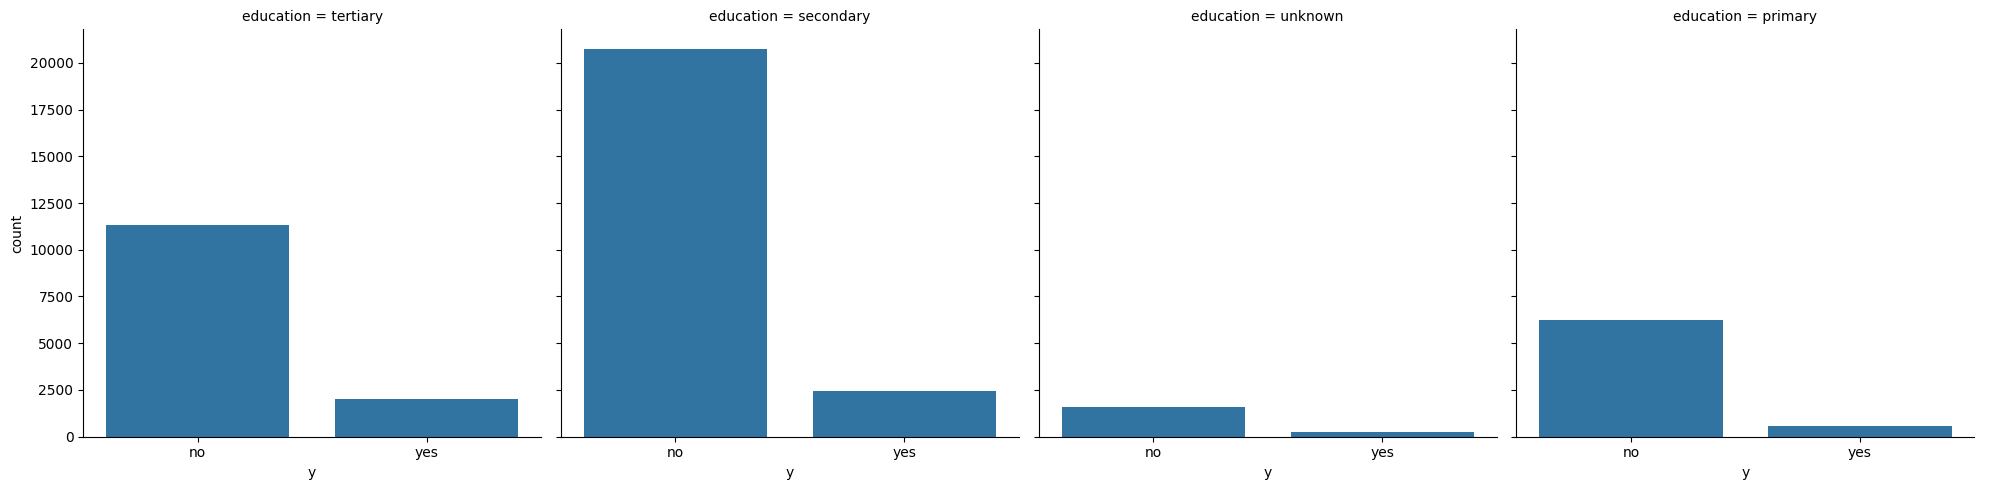

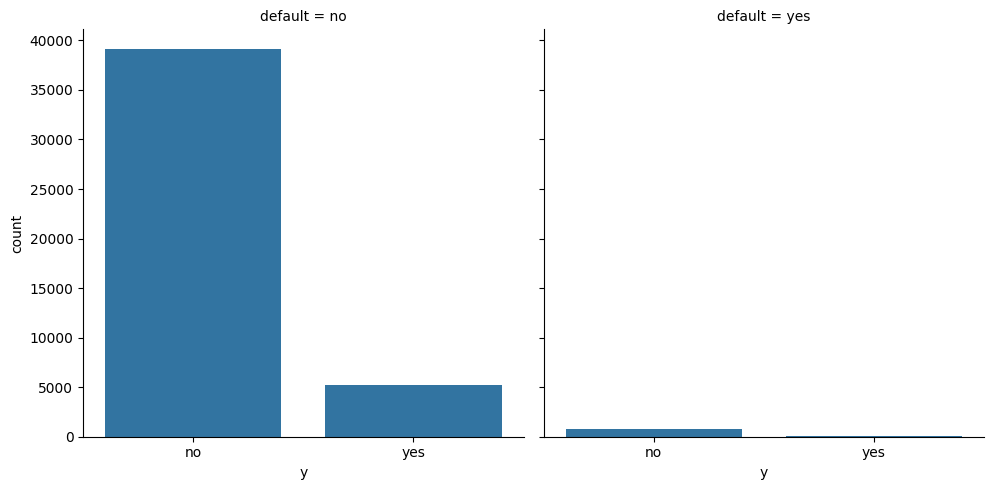

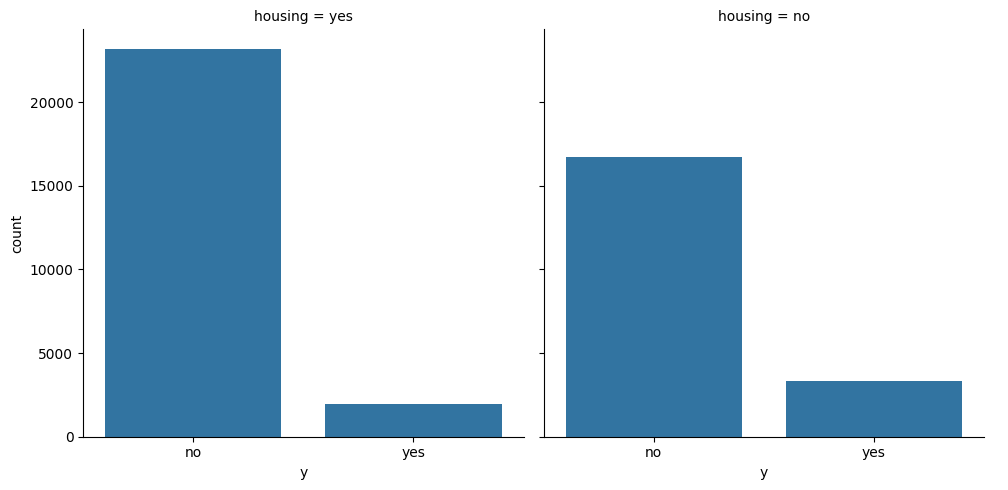

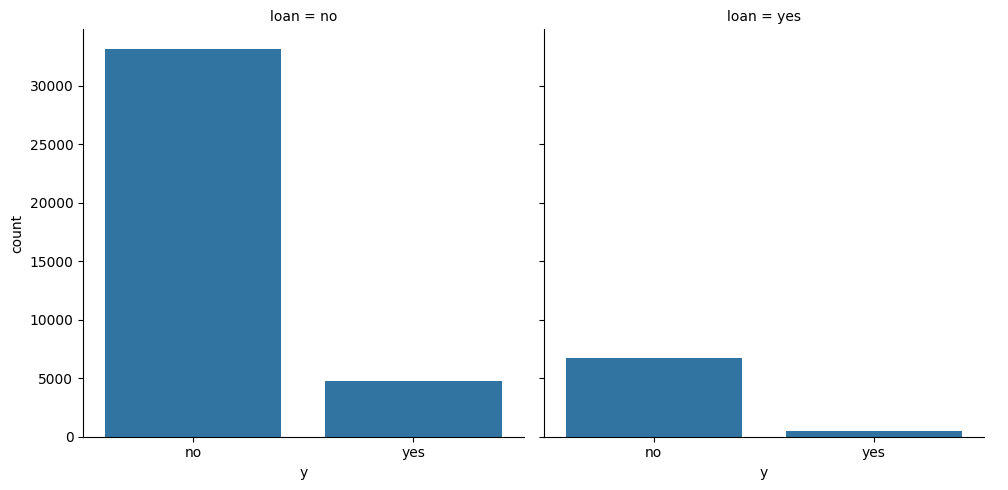

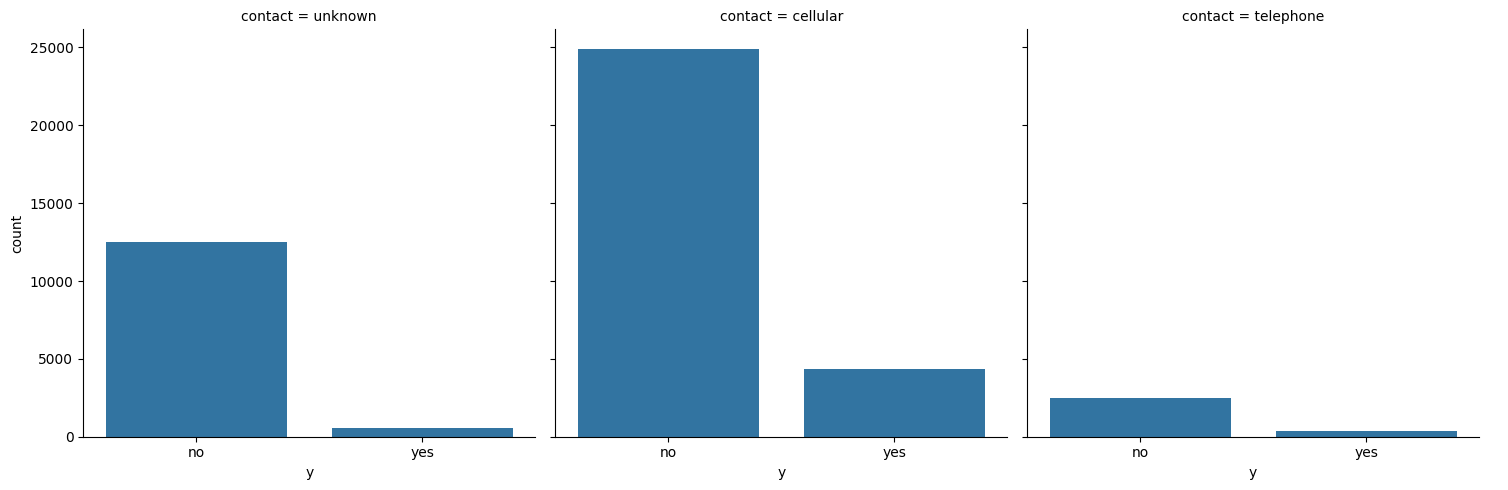

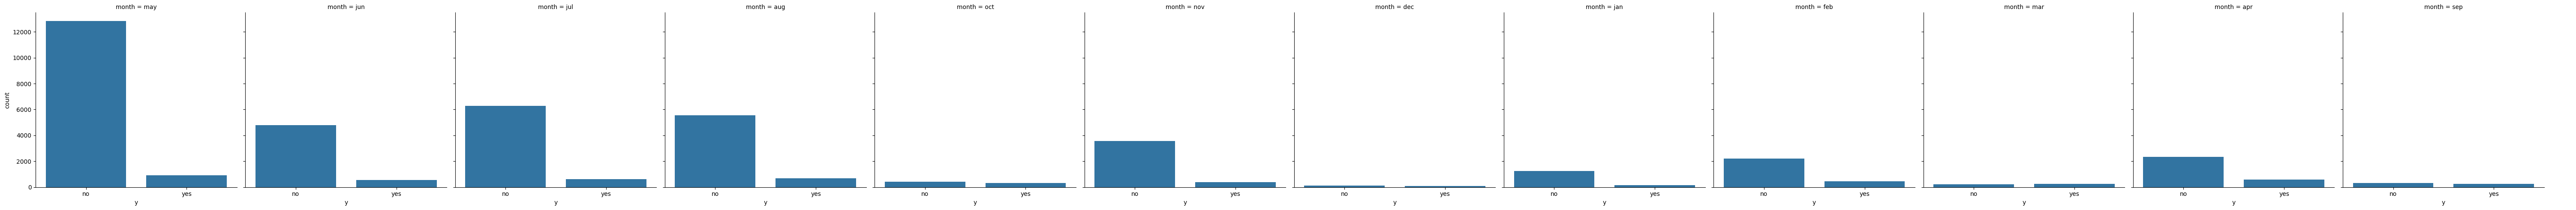

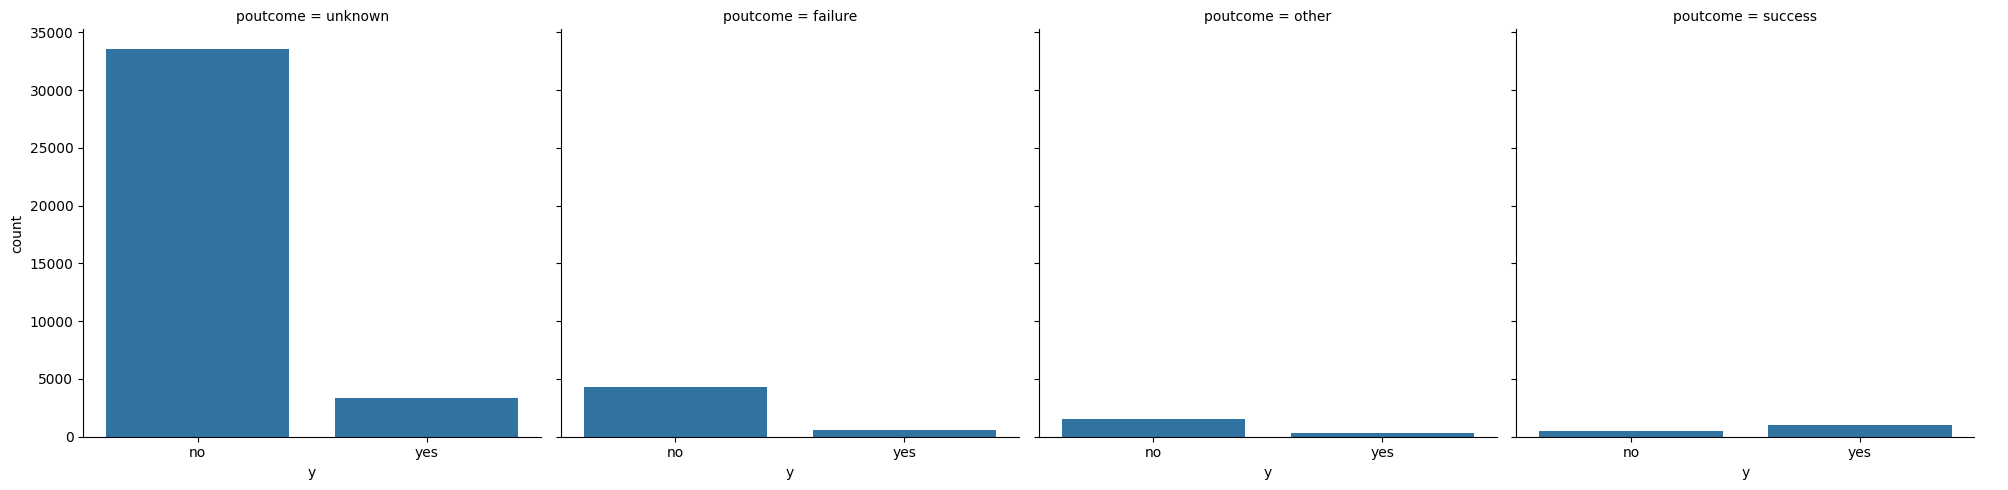

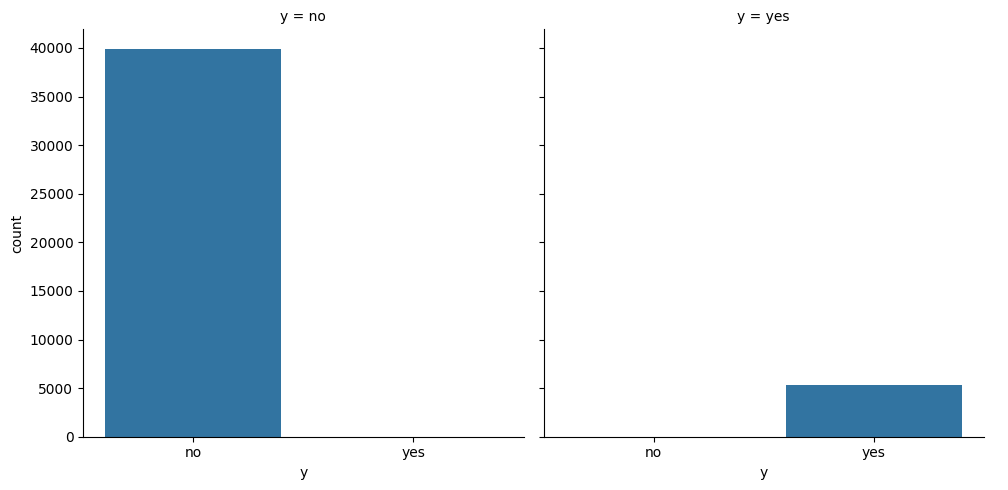

In [8]:
# categorical features and the target
for col in categorical_columns:
    sns.catplot(x="y",col = col,kind= "count", data = df)
plt.show()


**Findings**
- according to the client type how many of them subscribe this
- outcome of the pre campaign
- the month clients show there highest interest in deposit

In [9]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns  # Identify categorical columns
for column in numerical_columns:
    print(f"{column}")


age
balance
day
duration
campaign
pdays
previous


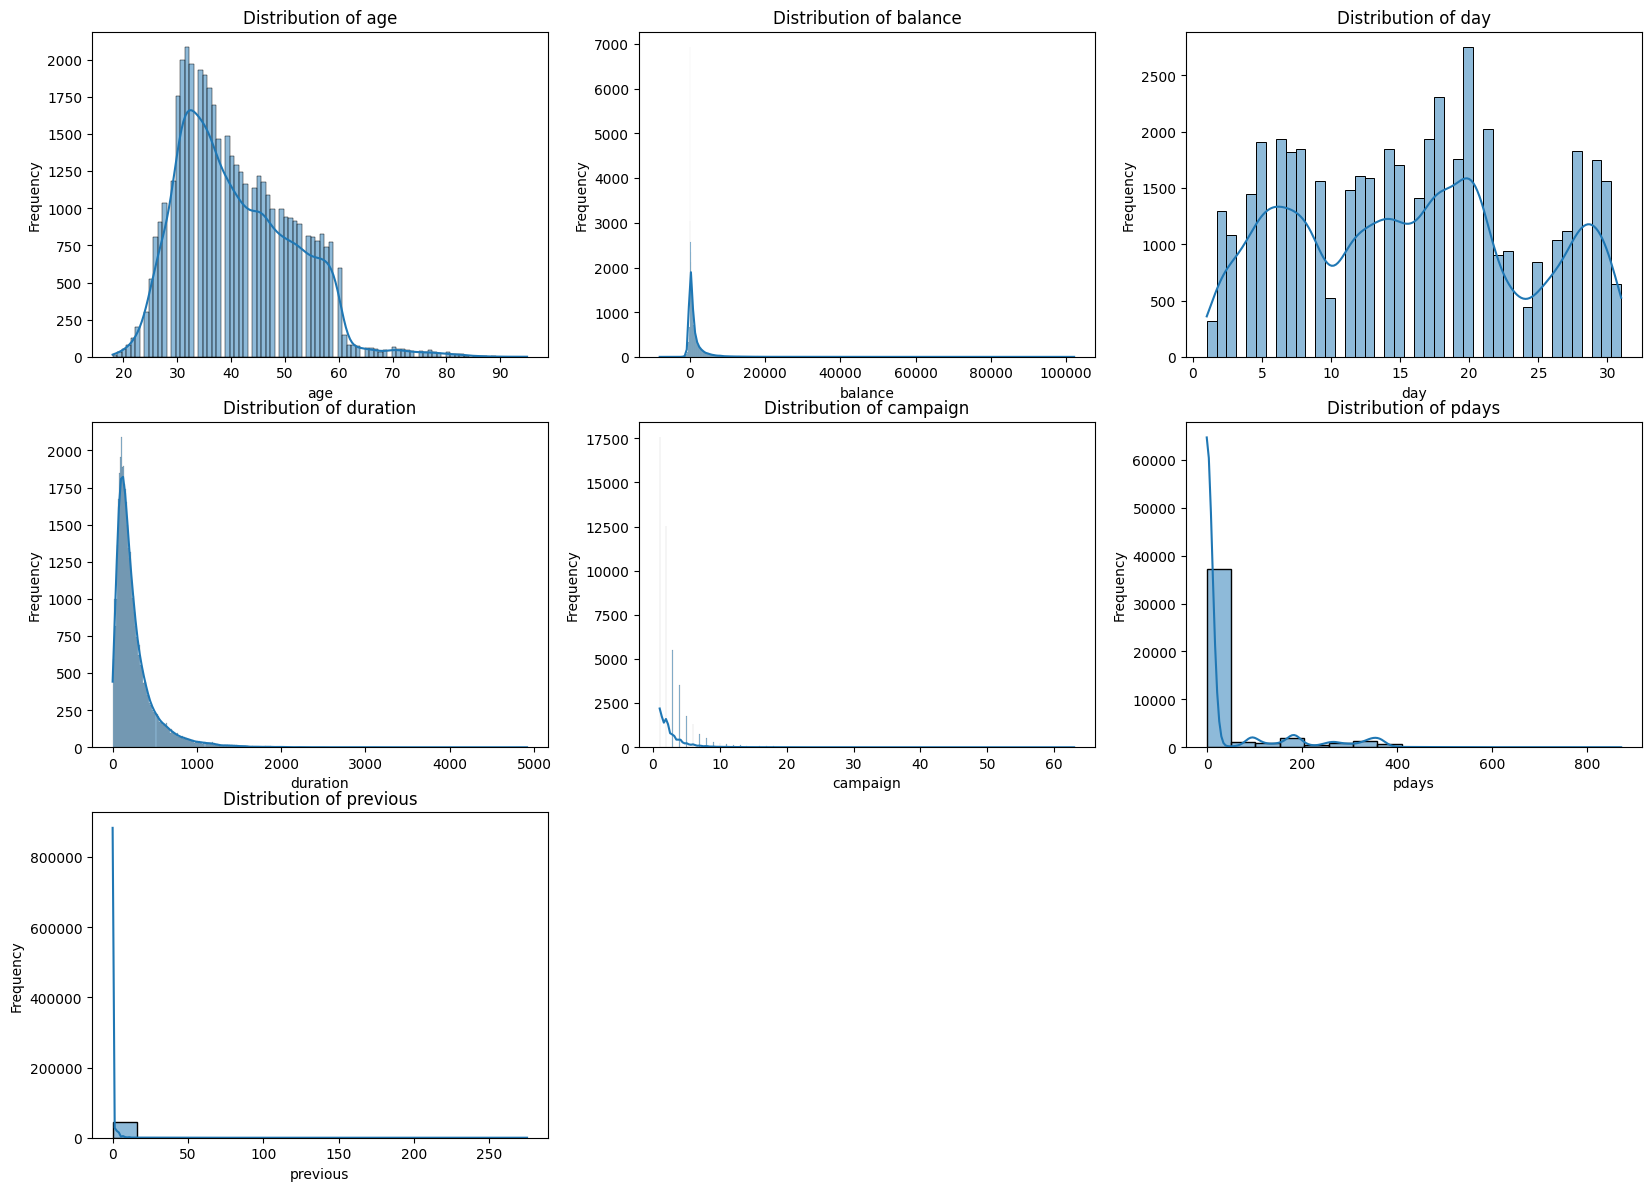

In [10]:

plt.figure(figsize=(20, 60))
plt_number = 1

for col in numerical_columns:
    ax = plt.subplot(12, 3, plt_number)
    sns.histplot(df[col], kde=True)  
    plt.xlabel(col)  
    plt.ylabel('Frequency')  
    plt.title(f'Distribution of {col}') 
    plt_number += 1


plt.show()

**Findings**
- in some distribtion thy seems to have outliers

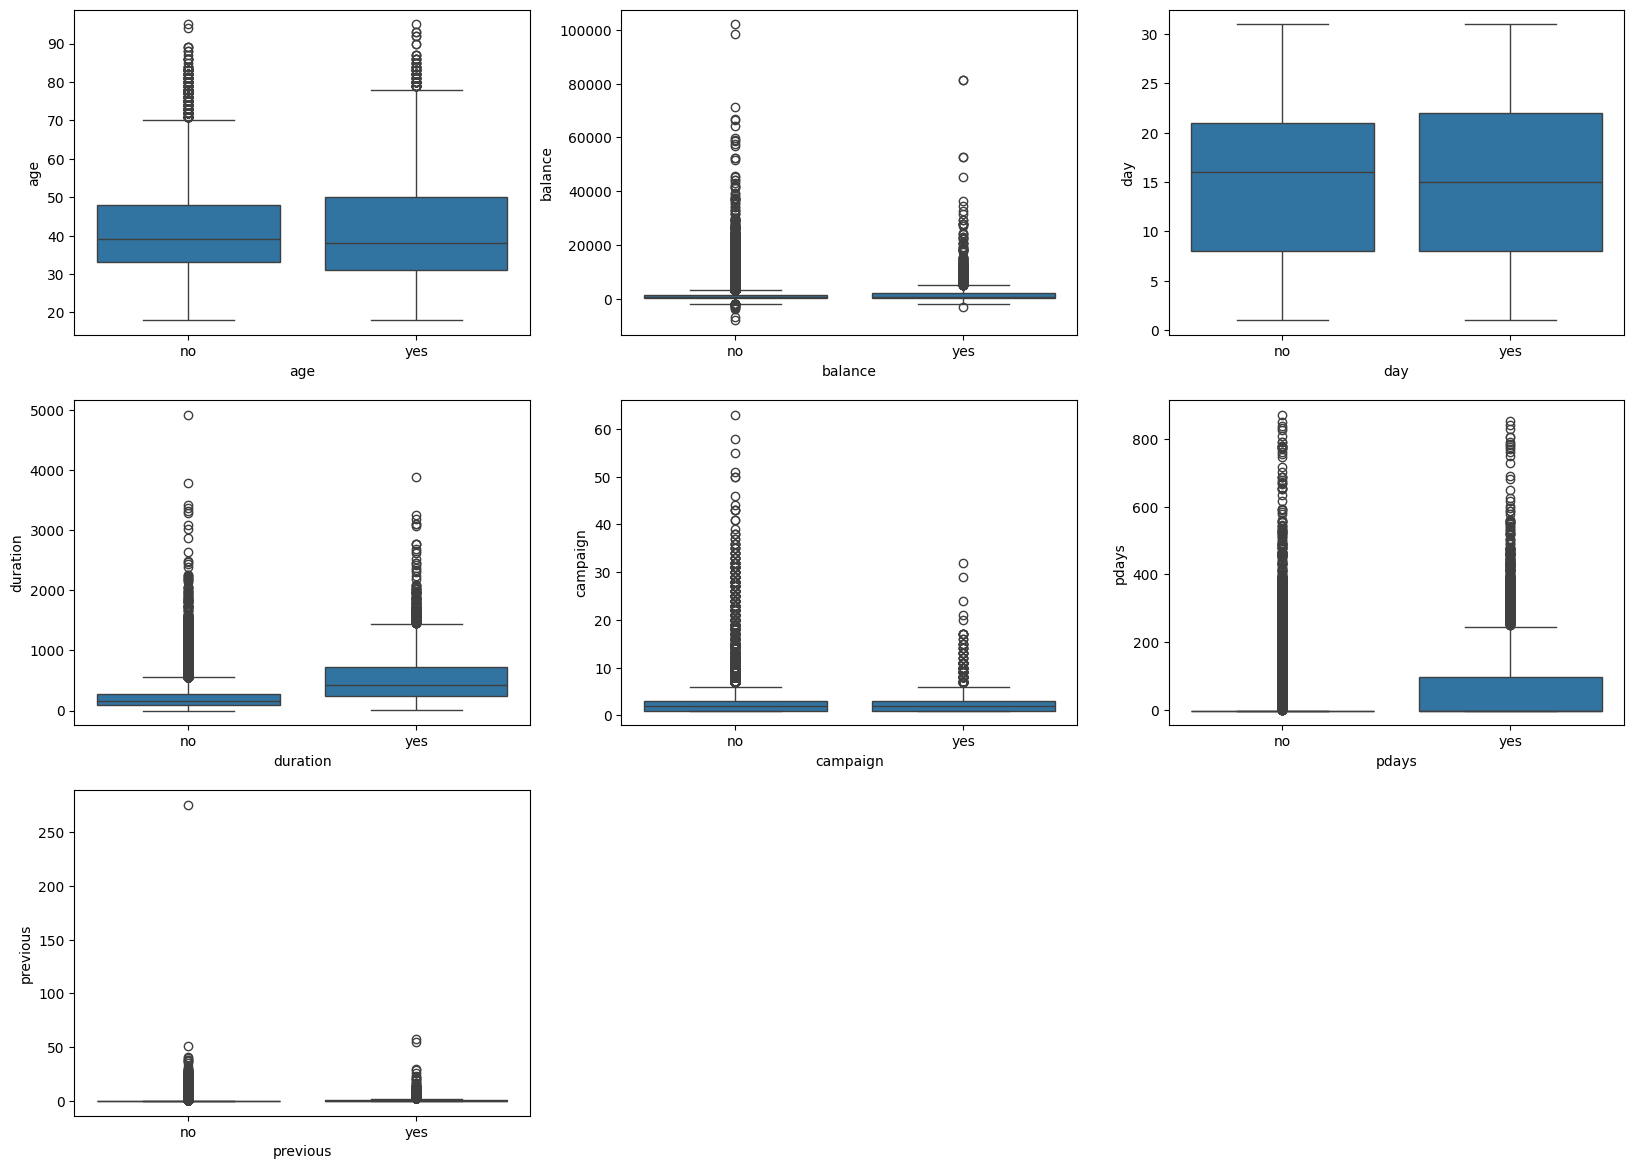

In [11]:
#finding the outliers of the numerical values
plt.figure(figsize=(20, 60))
plt_number = 1

for col in numerical_columns:
    ax = plt.subplot(12, 3, plt_number)
    sns.boxplot(x= df["y"], y = df[col])  
    plt.xlabel(col)  
    plt_number += 1


plt.show()

**Findings**
-  which range of the clients doing the deposits  in there features like age, balance and etc

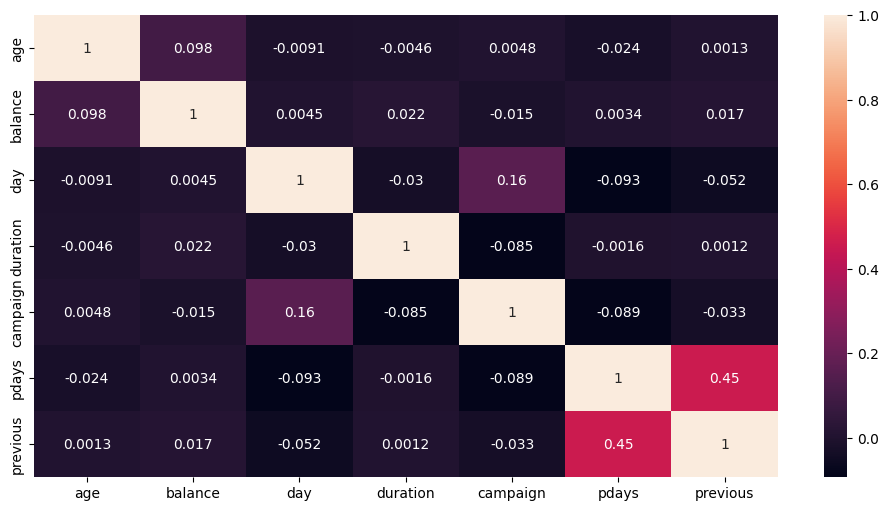

In [12]:
# Correlation between numerical fetures
cor = df.select_dtypes(include=['number']).corr()
fig = plt.figure(figsize=(12,6))
sns.heatmap(cor, annot= True)

plt.show()


**Findings**
- From the above heatmap we can find there is not much of correlation between the features

## **2. Feature Engneering**

In [13]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

In [15]:
df2.drop('duration', axis=1, inplace=True)


**Explanation**
- the duration is not known before a call is performed. Also, after the end of the call y is obviously known

In [16]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no


In [17]:
df_encoded = pd.get_dummies(df2, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])



In [18]:
from sklearn.preprocessing import StandardScaler

binary_col = ['housing','loan','default','y']
for col in binary_col:
    df_encoded[col] = df_encoded[col].apply(lambda x : True if x == 'yes' else False)


    

In [19]:
df_encoded

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,False,0.256419,True,False,-1.298476,-0.569351,-0.411453,-0.251940,False,...,False,False,True,False,False,False,False,False,False,True
1,0.288529,False,-0.437895,True,False,-1.298476,-0.569351,-0.411453,-0.251940,False,...,False,False,True,False,False,False,False,False,False,True
2,-0.747384,False,-0.446762,True,True,-1.298476,-0.569351,-0.411453,-0.251940,False,...,False,False,True,False,False,False,False,False,False,True
3,0.571051,False,0.047205,True,False,-1.298476,-0.569351,-0.411453,-0.251940,False,...,False,False,True,False,False,False,False,False,False,True
4,-0.747384,False,-0.447091,False,False,-1.298476,-0.569351,-0.411453,-0.251940,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,False,-0.176460,False,False,0.143418,0.076230,-0.411453,-0.251940,True,...,False,False,False,True,False,False,False,False,False,True
45207,2.831227,False,0.120447,False,False,0.143418,-0.246560,-0.411453,-0.251940,True,...,False,False,False,True,False,False,False,False,False,True
45208,2.925401,False,1.429593,False,False,0.143418,0.721811,1.436189,1.050473,True,...,False,False,False,True,False,False,False,False,True,False
45209,1.512791,False,-0.228024,False,False,0.143418,0.399020,-0.411453,-0.251940,False,...,False,False,False,True,False,False,False,False,False,True


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  float64
 10  month      45211 non-null  object 
 11  campaign   45211 non-null  float64
 12  pdays      45211 non-null  float64
 13  previous   45211 non-null  float64
 14  poutcome   45211 non-null  object 
 15  y          45211 non-null  object 
dtypes: float64(6), object(10)
memory usage: 5.5+ MB


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping



# Separate features and target
X = df_encoded.drop(columns=["y"])  # Replace "target" with your actual target column name
y = df_encoded["y"]

# Ensure target labels are numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),     # Hidden layer 1
    Dense(32, activation='relu'),     # Hidden layer 2
    Dense(1, activation='sigmoid')    # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    class_weight=class_weights_dict  # Include class weights
)

# Evaluate the model
results = model.evaluate(X_test, y_test)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Epoch 1/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6708 - loss: 0.6147 - val_accuracy: 0.7482 - val_loss: 0.5723
Epoch 2/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7819 - loss: 0.5527 - val_accuracy: 0.7625 - val_loss: 0.5483
Epoch 3/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7849 - loss: 0.5406 - val_accuracy: 0.7876 - val_loss: 0.5180
Epoch 4/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7844 - loss: 0.5272 - val_accuracy: 0.7953 - val_loss: 0.5218
Epoch 5/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7979 - loss: 0.5164 - val_accuracy: 0.7483 - val_loss: 0.5689
Epoch 6/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7951 - loss: 0.5124 - val_accuracy: 0.7408 - val_loss: 0.5773
Epoch 7/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7977 - loss: 0.5039 - val_accuracy: 0.8079 - val_loss: 0.4989
Epoch 8/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8009 - loss: 0.5029 - 

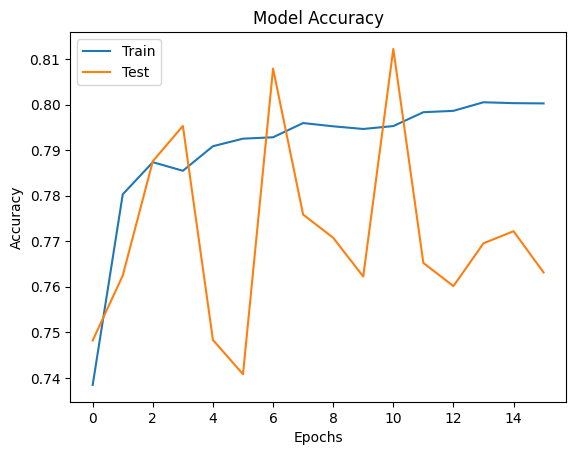

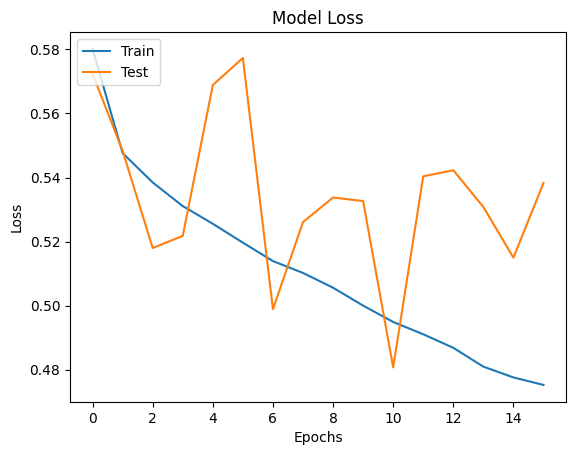

In [22]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Maximum depth of trees, None means no limit
    random_state=42,        # Random seed for reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)




In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8916288842198385

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.65      0.22      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043


Confusion Matrix:
[[7823  129]
 [ 851  240]]


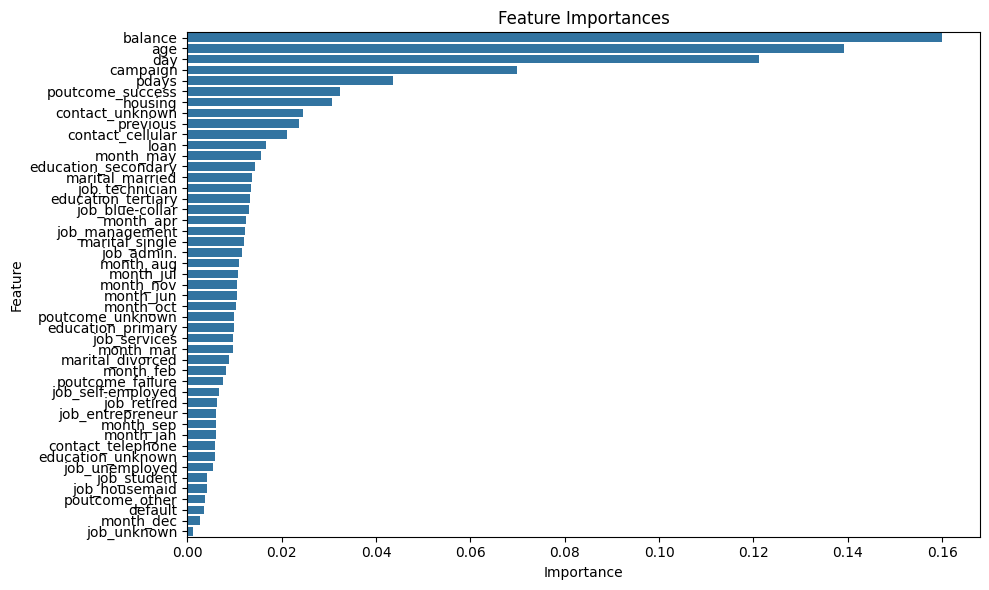

In [25]:
feature_importances = pd.DataFrame({
    'Feature': df_encoded.drop(columns=["y"]).columns,  # Replace 'y' with your target column name
    'Importance': rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


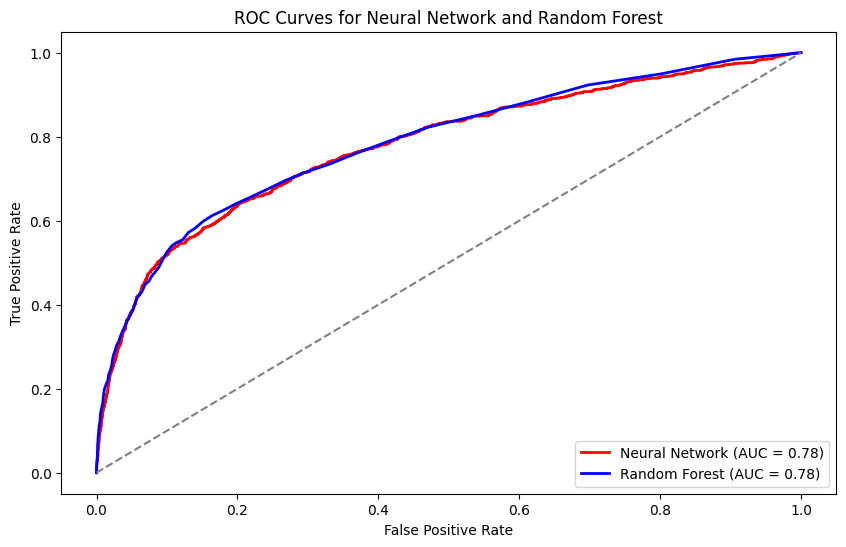

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for Random Forest (output class probabilities)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Get predicted probabilities for Neural Network (output class probabilities)
y_pred_prob_nn = model.predict(X_test)[:, 0]  # Probabilities for class 1

# Compute ROC curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network and Random Forest')
plt.legend(loc="lower right")
plt.show()
